# Use K-Nearest Neighbours Revenue Predictor

In this project, I created a Python notebook for predicting financial revenue of Bank using K-Nearest Neighbours model of machine learning.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Add date feature using Fastai add_datepart.

- Split our data into train and validation sets to verify our predictions.

- Create Linear Regression model that will be use to predict future bank revenues.

- Train and plot results.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

#### Import Libraries

In [1]:
#import packages
import numpy as np
import pandas as pd
import os
import sklearn.preprocessing as preproc

#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [3]:
def plot_hist(data):
    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, sharex=True)
    sns.despine(left=True)
    
    # Plot a simple histogram with binsize determined automatically
    sns.distplot(data, kde=False, color="b", ax=axes[0, 0])
    
    # Plot a kernel density estimate and rug plot
    sns.distplot(data, hist=False, rug=True, color="r", ax=axes[0, 1])
    
    # Plot a filled kernel density estimate
    sns.distplot(data, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
    
    # Plot a historgram and kernel density estimate
    sns.distplot(data, color="m", ax=axes[1, 1])
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()

#### Load data

In [4]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
data = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'])

In [6]:
df= data.copy()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


#### Distribbution

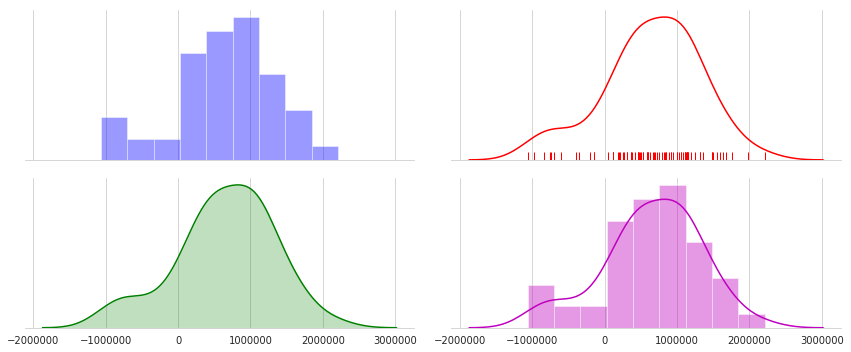

In [8]:
#show data distribution
x= df[['Revenue']]
plot_hist(x)

---

### Transformed Data

#### PowerTransform

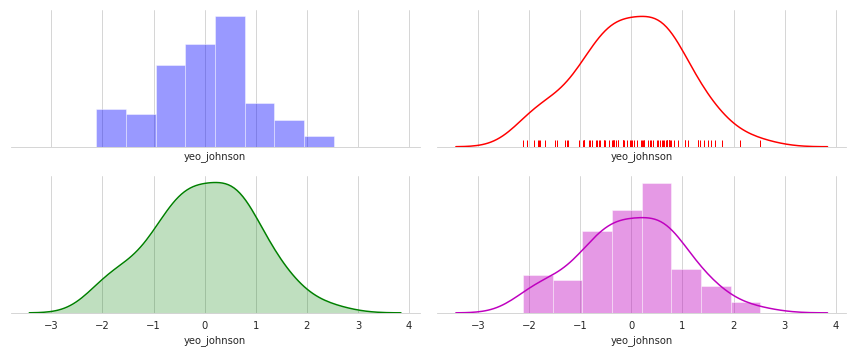

In [9]:
yeo_johnson = preproc.PowerTransformer(method='yeo-johnson')
df['yeo_johnson'] = yeo_johnson.fit_transform(x)
plot_hist(df['yeo_johnson'])

#### Standardscaler

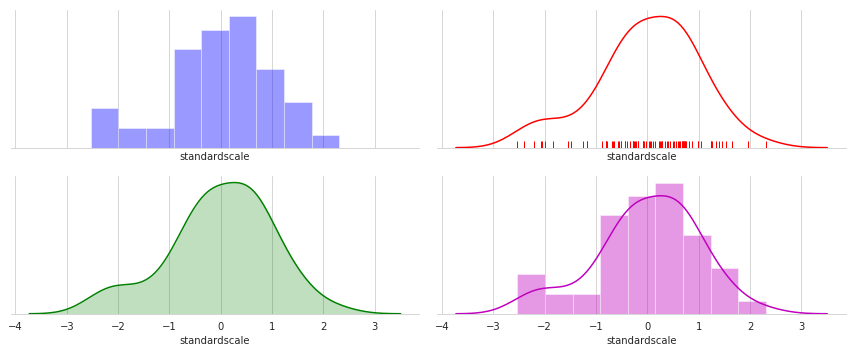

In [10]:
standardscale = preproc.StandardScaler()
df['standardscale'] = standardscale.fit_transform(x)
plot_hist(df['standardscale'])

#### Min-Max Scaling

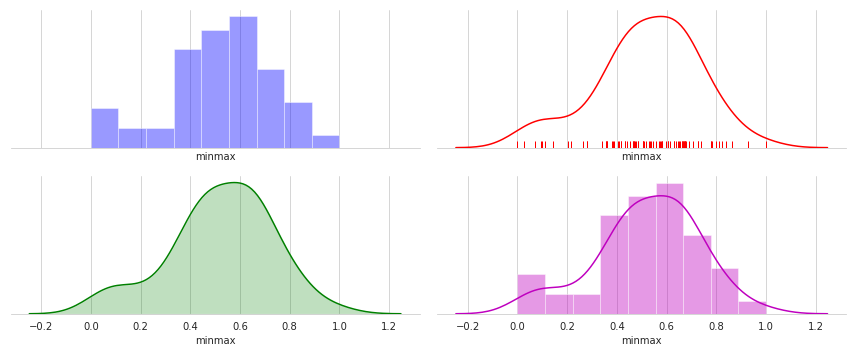

In [11]:
minmax = preproc.MinMaxScaler()
df['minmax'] = minmax.fit_transform(x)
plot_hist(df['minmax'])

In [12]:
df[:5]

,Date,Revenue,yeo_johnson,standardscale,minmax
0,2009-01-01,"943,690",0,0,1
1,2009-02-01,"1,062,565",1,1,1
2,2009-03-01,"210,079",-1,-1,0
3,2009-04-01,"-735,286",-2,-2,0
4,2009-05-01,"842,933",0,0,1


### Add Features

In [13]:
#import fastai to add_datepart feature
from fastai.structured import  add_datepart

In [14]:
#create features
add_datepart(df, 'Date')

In [15]:
#check datatypes
df.dtypes

Revenue             float64
yeo_johnson         float64
standardscale       float64
minmax              float64
Year                  int64
Month                 int64
Week                  int64
Day                   int64
Dayofweek             int64
Dayofyear             int64
Is_month_end           bool
Is_month_start         bool
Is_quarter_end         bool
Is_quarter_start       bool
Is_year_end            bool
Is_year_start          bool
Elapsed               int64
dtype: object

In [16]:
#change data to int
df.iloc[:,11:17] = df.iloc[:,11:17].astype(int)

In [17]:
#print preview of new data
df[:5]

,Revenue,yeo_johnson,standardscale,minmax,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,"943,690",0,0,1,2009,1,1,1,3,1,False,1,0,1,0,1,1230768000
1,"1,062,565",1,1,1,2009,2,5,1,6,32,False,1,0,0,0,0,1233446400
2,"210,079",-1,-1,0,2009,3,9,1,6,60,False,1,0,0,0,0,1235865600
3,"-735,286",-2,-2,0,2009,4,14,1,2,91,False,1,0,1,0,0,1238544000
4,"842,933",0,0,1,2009,5,18,1,4,121,False,1,0,0,0,0,1241136000


In [18]:
#elapsed will be the timestamp
df.drop('Elapsed', axis=1, inplace=True)

In [19]:
#split into train and validation
train = df[:72]
valid = df[72:]

In [20]:
train[:5]

,Revenue,yeo_johnson,standardscale,minmax,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,"943,690",0,0,1,2009,1,1,1,3,1,False,1,0,1,0,1
1,"1,062,565",1,1,1,2009,2,5,1,6,32,False,1,0,0,0,0
2,"210,079",-1,-1,0,2009,3,9,1,6,60,False,1,0,0,0,0
3,"-735,286",-2,-2,0,2009,4,14,1,2,91,False,1,0,1,0,0
4,"842,933",0,0,1,2009,5,18,1,4,121,False,1,0,0,0,0


In [21]:
#Assign the feature
x_train = train.drop(['Revenue','yeo_johnson','standardscale','minmax'], axis=1)
x_valid = valid.drop(['Revenue','yeo_johnson','standardscale','minmax'], axis=1)

#Assign the target - Yeo-Johnson
y_train_yj = train['yeo_johnson']
y_valid_yj = valid['yeo_johnson']

#Assign the target - Standardscaling
y_train_std = train['standardscale']
y_valid_std = valid['standardscale']

#Assign the target - MinMax
y_train_mm = train['minmax']
y_valid_mm = valid['minmax']

In [22]:
#create linear regression model
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [23]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [24]:
#fit the model and make predictions - Yeo-Johnson
model.fit(x_train,y_train_yj)
pred_yj = model.predict(x_valid)

#fit the model and make predictions - Standardscaling
model.fit(x_train,y_train_std)
pred_std = model.predict(x_valid)

#fit the model and make predictions - MinMax
model.fit(x_train,y_train_mm)
pred_mm = model.predict(x_valid)

In [25]:
#rmse - yeo-johnson
rms_yj = np.sqrt(np.mean(np.power((np.array(y_valid_yj)-np.array(pred_yj)),2)))

#rmse - standscaling
rms_std = np.sqrt(np.mean(np.power((np.array(y_valid_std)-np.array(pred_std)),2)))

#rmse - MinMax Scaling
rms_mm = np.sqrt(np.mean(np.power((np.array(y_valid_mm)-np.array(pred_mm)),2)))

print('PowerTransform RMSE: %.2f'%(rms_yj))
print('Standardscaling RMSE: %.2f'%(rms_std))
print('MinMax RMSE: %.2f'%(rms_mm))

PowerTransform RMSE: 1.13
Standardscaling RMSE: 1.09
MinMax RMSE: 0.23


#### Rescaling Prediction

In [26]:
valid['rescaled_yj'] = yeo_johnson.inverse_transform(pred_yj.reshape(-1,1))
valid['rescaled_std'] = standardscale.inverse_transform(pred_std.reshape(-1,1))
valid['rescaled_mm'] = minmax.inverse_transform(pred_mm.reshape(-1,1))
valid[:5]

,Revenue,yeo_johnson,standardscale,minmax,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,rescaled_yj,rescaled_std,rescaled_mm
72,"1,683,373",2,2,1,2015,1,1,1,3,1,False,1,0,1,0,1,"825,993","805,099","805,099"
73,"605,485",-0,-0,1,2015,2,5,1,6,32,False,1,0,0,0,0,"631,650","602,481","602,481"
74,"485,584",-0,-0,0,2015,3,9,1,6,60,False,1,0,0,0,0,"525,616","496,282","496,282"
75,"592,122",-0,-0,1,2015,4,14,1,2,91,False,1,0,1,0,0,"699,696","659,838","659,838"
76,"1,503,562",1,1,1,2015,5,18,1,4,121,False,1,0,0,0,0,"909,235","905,706","905,706"


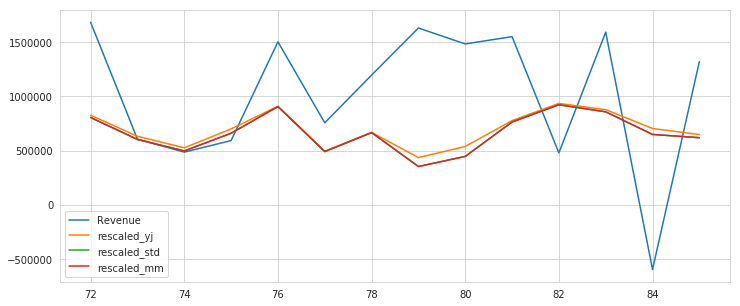

In [27]:
#plot the predictions which are rescaled-back againts the observed data that we have
cols = ['Revenue','rescaled_yj','rescaled_std','rescaled_mm']
plt.plot(valid[cols])
plt.legend(cols)